In [1]:
# computer vision based libaries in pytorch

import torch
from torch import nn

# torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# printing libary versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [2]:
# working with a dataset
# getting a dataset
#  using the fashion MNIST dataset
# setting up the training data

train_data =  datasets.FashionMNIST(root="data",
                                       train=True,
                                       download=True,
                                       transform=torchvision.transforms.ToTensor(),
                                       target_transform=None
                                       )
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None

)

100%|██████████| 26421880/26421880 [00:07<00:00, 3542433.26it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210423.15it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3897188.56it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9882048.97it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# data inspection
len(train_data), len(test_data)

(60000, 10000)

In [4]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])
9


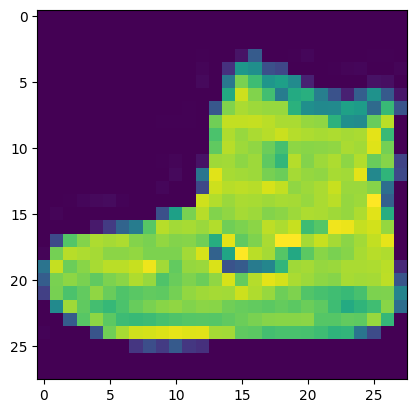

In [5]:
# image visualization
image, label = train_data[0]

print(f"Image shape: {image.shape}")
print(label)
plt.imshow(image.squeeze())

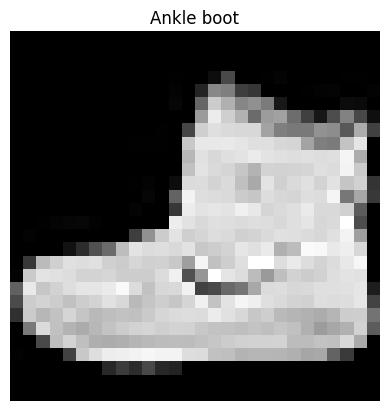

In [6]:
# visualizing the data in gray scale
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()

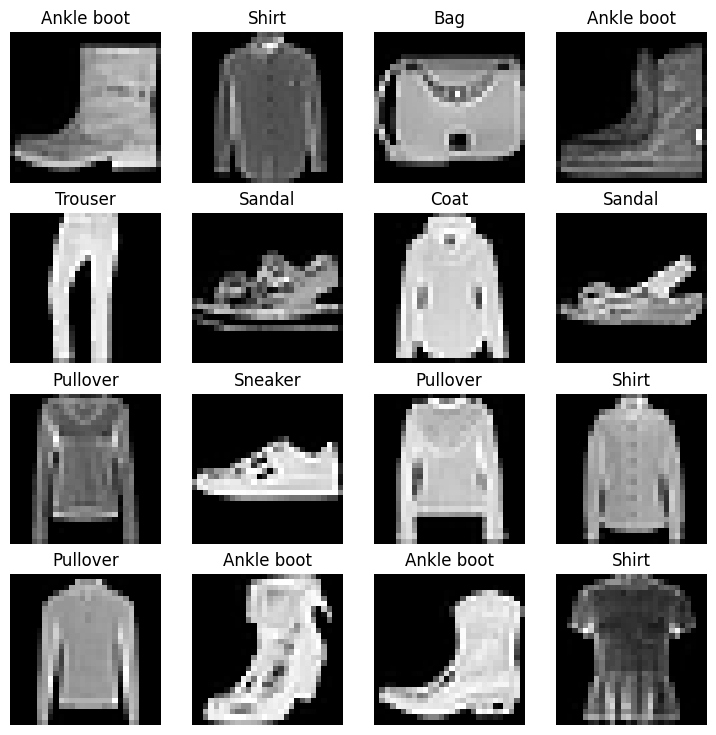

In [7]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))

rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)
plt.show()

In [8]:
# preparing the datatoader
from torch.utils.data import DataLoader

# setting up the batch size
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle =True)
test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle =False)


In [9]:
print(f'DATALOADERS:{train_dataloader, test_dataloader}')
print(f"Length of train dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f'Lenght of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...')

DATALOADERS:(<torch.utils.data.dataloader.DataLoader object at 0x7db69fc269e0>, <torch.utils.data.dataloader.DataLoader object at 0x7db69f6af520>)
Length of train dataloader:1875 batches of 32...
Lenght of test_dataloader: 313 batches of 32...


In [10]:

train_features_batch, train_labels_batch = next(iter(train_dataloader))

print(train_features_batch.shape, train_labels_batch.shape )

torch.Size([32, 1, 28, 28]) torch.Size([32])


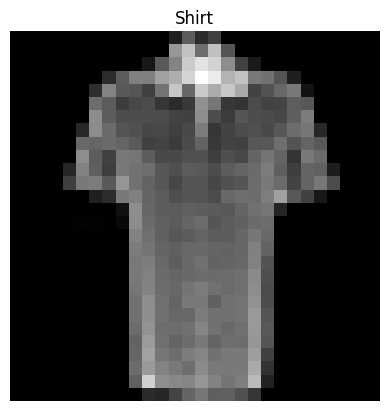

Image_shape:torch.Size([1, 28, 28])


In [11]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()
print(f"Image_shape:{img.shape}")
# print()


In [12]:
# building the baseline computervision model
#creating a flattened layer

flatten_model = nn.Flatten()

x = train_features_batch[0]
print(x.shape)

# Flatten the sample

output = flatten_model(x)

print(f"New Model shape {output.shape}")

torch.Size([1, 28, 28])
New Model shape torch.Size([1, 784])


In [13]:
class FashionMnistV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.Linear(hidden_units, output_shape)
    )
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.layer_stack(x)



In [14]:
len(class_names)

10

In [15]:
# creating the device agnostic code
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [16]:
# creating the namual seed to ensure experiment replication
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0 = FashionMnistV0(input_shape=output.shape[1], #this can be replaced with 784 units
                        hidden_units=10,
                        output_shape=len(class_names) # in this case this is 10 classes
                        )
model_0.to(device)
model_0


FashionMnistV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
# creating a random image to tenst the model
dummy_x = torch.rand([1,1,28,28]).to(device)
model_0(dummy_x)


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [18]:
# making the model more visual
# from the matrics it seems the model is not learning
# makr predictions and make them visual

import requests
from pathlib import Path

# downloading pytorch helper funrtions to colab if not already available
if Path("helper_functions.py").is_file():
  print("file already exists skipping download")
else:
  print('downloading the helper_functions.py')
  response = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(response.content)

downloading the helper_functions.py


In [19]:
# importing the accuracy_fn to handle the operations for the metrics calculation for tha model
from helper_functions import accuracy_fn

In [20]:
# building the training and testing loop
# setting up loss and optimizer  and eval matrics
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr=0.1
)



In [21]:
# creating an experiment timer function
from timeit import  default_timer as timer

def print_train_time(start:float,end:float,device:torch.device=None):
  """Prints the difference between the start and the end time of the experiment """
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


In [22]:
from tqdm.auto import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42)


start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n____')
  train_loss = 0
  # add a loop for traveresing the training data
  for batch, (X, y) in enumerate(train_dataloader):
    X = X.to(device)
    y = y.to(device)
    model_0.train()
    y_preds = model_0(X)
    loss = loss_fn(y_preds, y)

    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 ==0:
      print(f"Looked at {batch *len(X)}/{len(train_dataloader.dataset)} samples")
  # divide the total tain_loss
  train_loss /=len(train_dataloader)

  # testing loos
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)
      test_pred = model_0(X_test)
      test_loss +=loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))
    # calculate the test loss avaerage per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f'\n Train_loss:{train_loss:.4f}| Test loss:{test_loss:.4f}| Test acc: {test_acc:.2f}%')

stop_time = timer()

total_train_time = print_train_time(start=start_time, end=stop_time, device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
____
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train_loss:0.5904| Test loss:0.5095| Test acc: 82.04%
Epoch: 1
____
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train_loss:0.4763| Test loss:0.4799| Test acc: 83.20%
Epoch: 2
____
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train_loss:0.4550| Test loss:0.4766| Test acc: 83.43%
Train time on cpu: 31.753 seconds


In [23]:
# making predictions and evaluate results
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               device: torch.device,
               accuracy_fn):
 """Returning a dictionary containing the results of the model predicting on the data_loader. """
 loss, acc  = 0,0
 model.eval()
 with torch.inference_mode():
  for X, y in tqdm(data_loader):
    X = X.to(device)
    y = y.to(device)
    y_pred = model(X)
    loss += loss_fn(y_pred, y)
    acc +=accuracy_fn(y,y_pred.argmax(dim=1))
  loss /= len(data_loader)
  acc /= len(data_loader)
 return {
     "model_name": model.__class__.__name__,
     "model_loss":loss.item(),
     "model_acc" :acc
 }

model_0_results = eval_model(
     model=model_0,
     data_loader = test_dataloader,
     loss_fn =loss_fn,
     accuracy_fn=accuracy_fn,
     device = device
 )

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMnistV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [24]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [25]:
# creating model with linear and non-linear lines
class FashionMnistV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_unit:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_unit),
        nn.ReLU(),
        nn.Linear(hidden_unit, output_shape),
        nn.ReLU(),
        # nn.Linear(hidden_unit,output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

model_1 = FashionMnistV1(
    input_shape=784,
    hidden_unit=10,
    output_shape=len(class_names)
)

In [26]:
# creating the loss and optimizer functions
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.1)

In [27]:
# making the test and train to functions
def train_step(
    model:torch.nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device:torch.device=device):
  """
  Performs a training with model trying to learn on a data_loader
  """
  loss, acc=0,0
  for batch, (X,y) in enumerate(data_loader):
    X,y = X.to(device), y.to(device)
    y_pred = model(X)
    temp_loss = loss_fn(y_pred, y)
    loss +=temp_loss
    temp_acc = accuracy_fn(y, y_pred.argmax(dim=1))
    acc +=temp_acc
    optimizer.zero_grad()
    temp_loss.backward()
    optimizer.step()
  loss /= len(data_loader)
  acc /=len(data_loader)
  print(f'Train loss:{loss:.5f}| Train acc: {acc:.2f}%')
  return loss, acc

def test_step(
  model:torch.nn.Module,
  loss_fn:torch.nn.Module,
  accuracy_fn,
  device:torch.device=device,
  data_loader = test_dataloader
  ):
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in data_loader:
      X_test,y_test = X_test.to(device),y_test.to(device)
      y_pred = model(X_test)
      test_loss += loss_fn(y_pred,y_test)
      test_acc += accuracy_fn(y_test, y_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
  return test_loss, test_acc



In [28]:
# setting the seed for random number generation
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 3
start_time = timer()

# iterating over the epochs to perform the iterations over the various items in thed dataset
model_1.to(device)
for epoch in tqdm(range(epochs)):
  model_1.train()
  train_loss, train_acc = train_step(
    model=model_1,
    data_loader= train_dataloader,
    loss_fn=loss_fn,
    optimizer= optimizer,
    accuracy_fn=accuracy_fn,
    )
  # performing an inference loop

  test_loss, test_acc = test_step(
      model=model_1,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn
  )


  print(f'\nTrain_loss:{train_loss:.4f}| Train_acc:{train_acc:.2f}% |Test loss:{test_loss:.4f}| Test acc: {test_acc:.2f}%')


stop_time = timer()

total_train_time = print_train_time(start=start_time, end=stop_time, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Train loss:1.11456| Train acc: 58.46%

Train_loss:1.1146| Train_acc:58.46% |Test loss:0.9632| Test acc: 63.41%
Train loss:0.90905| Train acc: 64.87%

Train_loss:0.9091| Train_acc:64.87% |Test loss:0.7454| Test acc: 72.61%
Train loss:0.59506| Train acc: 78.26%

Train_loss:0.5951| Train_acc:78.26% |Test loss:0.4953| Test acc: 82.68%
Train time on cpu: 31.320 seconds


In [29]:
model_1_results = eval_model(
     model=model_1,
     data_loader = test_dataloader,
     loss_fn =loss_fn,
     accuracy_fn=accuracy_fn,
     device = device
 )

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMnistV1',
 'model_loss': 0.495336651802063,
 'model_acc': 82.67771565495208}

In [30]:
# switching from working with just linear layer classification to working with CNNs
class FashionMNistV2(nn.Module):
  """Model architecture that replicates the common online CNN architecture implementation (TinyVGG)"""
  def __init__(self,
               input_shape:int,
               hidden_unit:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(input_shape, hidden_unit, kernel_size=3, stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_unit,
            out_channels=hidden_unit,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2= nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_unit,
            out_channels=hidden_unit,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
          nn.Conv2d(
            in_channels=hidden_unit,
            out_channels=hidden_unit,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(hidden_unit*7*7,
                output_shape)
    )
  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [31]:
# making a random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = FashionMNistV2(
    input_shape=1,
    hidden_unit=10,
    output_shape=len(class_names)
).to(device)

In [32]:
# creating a random batch of images
# first set manual_seed
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f'Batch images shape:{images.shape}')
print(f"Single image shape:{test_image.shape}")

test_image

Batch images shape:torch.Size([32, 3, 64, 64])
Single image shape:torch.Size([3, 64, 64])


tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [33]:
# creating simgle conv2d layer

conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=0
)

# pass the data throught he cov_layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [34]:
# working with the nn.MaxPool2d() layer
test_image
# sample nn.Maxpoollayer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_conv = conv_layer(test_image.unsqueeze(0))

print(f'Test image conv shape: {test_image_conv.shape}')

test_image_pool = max_pool_layer(test_image_conv)

print(f'maxpool conv passes shape:{test_image_pool.shape}')

Test image conv shape: torch.Size([1, 10, 62, 62])
maxpool conv passes shape:torch.Size([1, 10, 31, 31])


In [35]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,1,2,2))
# random_tensor
# passing the random tensor throught he maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f'tensor shape: {max_pool_tensor.shape}')
print(f'tensor shape: {max_pool_tensor}')

tensor shape: torch.Size([1, 1, 1, 1])
tensor shape: tensor([[[[0.3367]]]])


In [36]:
torch.manual_seed(42)
random_image_tensor = torch.randn(size=(1,28,28))

model_2(random_image_tensor.unsqueeze(0).to(device))


tensor([[ 0.0505, -0.0729,  0.0821, -0.0451, -0.0044,  0.0383,  0.0061, -0.0016,
         -0.0127, -0.0081]], grad_fn=<AddmmBackward0>)

In [37]:
# setup loss funciton
from helper_functions import accuracy_fn


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)


In [38]:
# creating the epoch count
torch.manual_seed(42)
torch.manual_seed(42)
epochs = 3

model_2.to(device)
start_time=timer()
for epoch in tqdm(range(epochs)):
  train_loss, train_acc = train_step(
      data_loader = train_dataloader,
      model=model_2,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn,
      device = device
  )
  test_loss, test_acc = test_step(
      model=model_2,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      data_loader = test_dataloader
  )
  print(f'\nTrain_loss:{train_loss:.4f}| Train_acc:{train_acc:.2f}% |Test loss:{test_loss:.4f}| Test acc: {test_acc:.2f}%')
stop_time = timer()

total_train_time = print_train_time(start=start_time, end=stop_time, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Train loss:0.59518| Train acc: 78.38%

Train_loss:0.5952| Train_acc:78.38% |Test loss:0.3950| Test acc: 85.99%
Train loss:0.36536| Train acc: 86.90%

Train_loss:0.3654| Train_acc:86.90% |Test loss:0.3524| Test acc: 86.91%
Train loss:0.32588| Train acc: 88.13%

Train_loss:0.3259| Train_acc:88.13% |Test loss:0.3272| Test acc: 88.07%
Train time on cpu: 167.031 seconds


In [39]:
# model_2 results calculation
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)


  0%|          | 0/313 [00:00<?, ?it/s]

In [40]:
model_0_results, model_1_results, model_2_results

({'model_name': 'FashionMnistV0',
  'model_loss': 0.47663894295692444,
  'model_acc': 83.42651757188499},
 {'model_name': 'FashionMnistV1',
  'model_loss': 0.495336651802063,
  'model_acc': 82.67771565495208},
 {'model_name': 'FashionMNistV2',
  'model_loss': 0.32718968391418457,
  'model_acc': 88.06908945686901})

In [41]:
import pandas as pd
compare_results = pd.DataFrame([
    model_0_results,
    model_1_results,
    model_2_results
])
compare_results

,model_name,model_loss,model_acc
0,FashionMnistV0,0.476639,83.426518
1,FashionMnistV1,0.495337,82.677716
2,FashionMNistV2,0.327190,88.069089


Text(0, 0.5, 'Model')

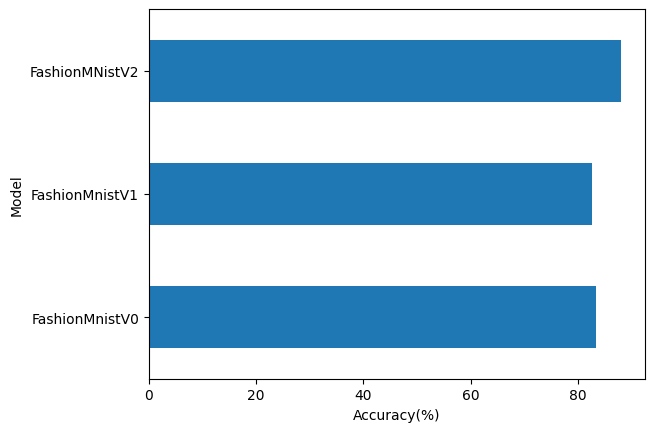

In [42]:
# data visualization
compare_results.set_index("model_name")['model_acc'].plot(kind='barh')
plt.xlabel("Accuracy(%)")
plt.ylabel("Model")

In [43]:
# make and evaluate random predictions with best mode

def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device = device):
  pred_probs:list=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)

      pred_prob=torch.softmax(pred_logit.squeeze(), dim=0).cpu()
      pred_probs.append(pred_prob)
  return torch.stack(pred_probs)



In [75]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9 ):
  test_samples.append(sample)
  test_labels.append(label)

pred_probs = make_predictions(model = model_2, data=test_samples)

# conver this test_samples to tensors

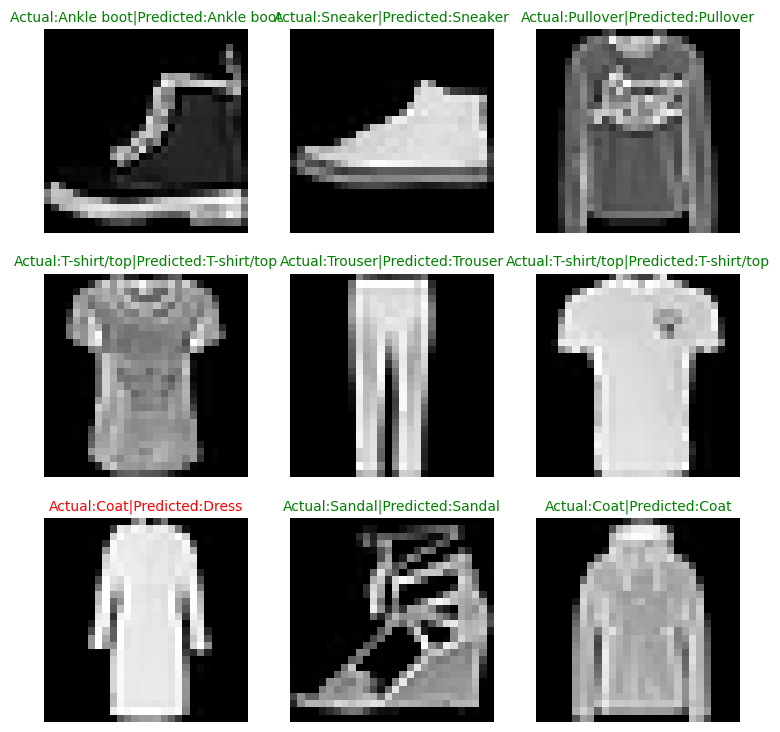

In [76]:
pred_classes = pred_probs.argmax(dim=1)
plt.figure(figsize=(9,9))
nrows, ncolumns = 3,3

# fir each of the samples plot then
for i, sample in enumerate(test_samples):
  # random_idx = torch.randint(0,len(train_data), size=[1]).item()
  # print(random_idx)
  plt.subplot(3,3,i+1)
  plt.imshow(sample.squeeze(),cmap='gray')
  if class_names[test_labels[i]]==class_names[pred_classes[i]]:
    plt.title(f"Actual:{class_names[test_labels[i]]}|Predicted:{class_names[pred_classes[i]]}", fontsize=10, c="g")
  else:
    plt.title(f"Actual:{class_names[test_labels[i]]}|Predicted:{class_names[pred_classes[i]]}", fontsize=10, c="r")
  plt.axis(False)
plt.show()


In [86]:
!pip install -q torchmetrics

In [94]:
from tqdm.auto import tqdm
y_preds = []
model_2.to(device)
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions ..."):
    X,y = X.to(device), y.to(device)
    y_logits = model_2(X)

    y_pred = y_logits.argmax(dim=1)
    # y_preds.append(y_pred)
    # putting preditons on cpu
    y_preds.append(y_pred.cpu())
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
# y_pred_tensor.sha


Making predictions ...:   0%|          | 0/313 [00:00<?, ?it/s]

In [85]:
import mlxtend
import torchmetrics
mlxtend.__version__,torchmetrics.__version__

('0.22.0', '1.4.0')

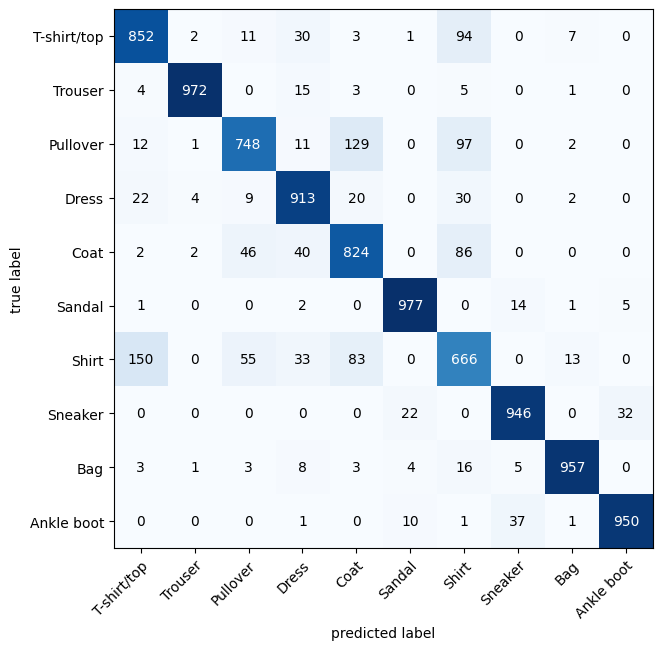

In [98]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(
     y_pred_tensor,
    test_data.targets
)
fix, ax = plot_confusion_matrix(
   conf_mat = confmat_tensor.numpy(),
   class_names = class_names,
   figsize = (10,7)
)


In [99]:
from pathlib import Path

# create model directorey

MODEL_PATH  = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="01_pytorch_computer_vision.pth"

MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

In [101]:
# loading the model
loaded_model = FashionMNistV2(
    input_shape=1,
    hidden_unit=10,
    output_shape=len(class_names)
).to(device)

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [104]:
torch.manual_seed(42)
loaded_model_results = eval_model(
    model = loaded_model,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn  = accuracy_fn,
    device=device
)
loaded_model_results, model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNistV2',
  'model_loss': 0.32718968391418457,
  'model_acc': 88.06908945686901},
 {'model_name': 'FashionMNistV2',
  'model_loss': 0.32718968391418457,
  'model_acc': 88.06908945686901})

In [108]:
torch.isclose(torch.tensor(loaded_model_results['model_loss']),torch.tensor(model_2_results['model_loss']),
              atol=1e-02
              )

tensor(True)